In [3]:
%reload_ext autoreload
%autoreload 2
    
import h5py as h5
import matplotlib.pyplot as plt
from astropy.time import Time
import datetime as dt
import aftpy as aft
import sunpy.map
import numpy as np
import astropy.io.fits as fits
from sunpy.map.header_helper import make_heliographic_header
import pandas as pd

# import pfsspy
# from pfsspy import coords, tracing
# file1 = "/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2020/01/AFTmap_20200101_0000.h5"
file1 = "/Users/bjha/Data/AFT/AFTmaps/2015/01/AFTmap_20150101_0000.h5"
# file2 = "/Users/bjha/Downloads/AFTmap_20100502_0000.h5"

aftmap1 = aft.AFTmap(file1)
# aftmap2 = aft.AFTmap(file2)

aftdata = aft.AFTmaps(path="/Users/bjha/Data/AFT/AFTmaps")
# # aftdata.convert_all(outpath="/Users/bjha/Data/AFT/test_fits")
# # aftmap1.info

RootDir   : /Users/bjha/Data/AFT/AFTmaps  
FileType  : aftmap                        
# Files   : 19975                         
T-Initial : 2010-05-01 06:00:00           
T-End     : 2024-01-01 18:00:00           


In [4]:
aftdata.generate_parameters("/Users/bjha/Data/AFT/AFT_parameters_hmifd.csv")

,Time,PolarN,PolarS,ADM,EDM,TotalFlux
0,2010-05-01T06:00:00.000,-2.958166,2.729803,-1.282314,0.569644,1.779061e+23
1,2010-05-01T12:00:00.000,-2.943356,2.723071,-1.271876,0.586568,1.802169e+23
2,2010-05-01T18:00:00.000,-2.936948,2.722010,-1.274914,0.592929,1.820611e+23
3,2010-05-02T00:00:00.000,-2.932239,2.727893,-1.256256,0.602634,1.807418e+23
4,2010-05-02T06:00:00.000,-2.925721,2.719423,-1.259650,0.606212,1.827435e+23
...,...,...,...,...,...,...
19970,2023-12-31T18:00:00.000,0.089997,-0.524239,0.550244,0.406699,4.492672e+23
19971,2024-01-01T00:00:00.000,0.087586,-0.520279,0.549647,0.406269,4.458577e+23
19972,2024-01-01T06:00:00.000,0.086584,-0.520475,0.549158,0.403405,4.424431e+23
19973,2024-01-01T12:00:00.000,0.086068,-0.522926,0.549057,0.401879,4.399948e+23


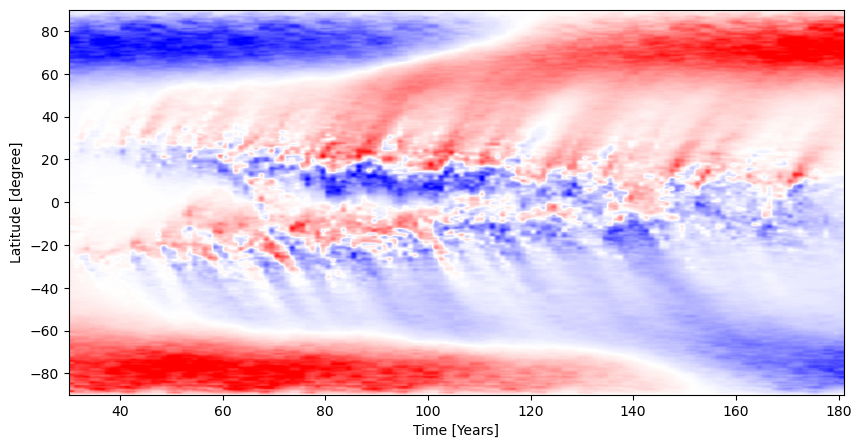

In [24]:
aftdata.visualize.plot_butterfly()

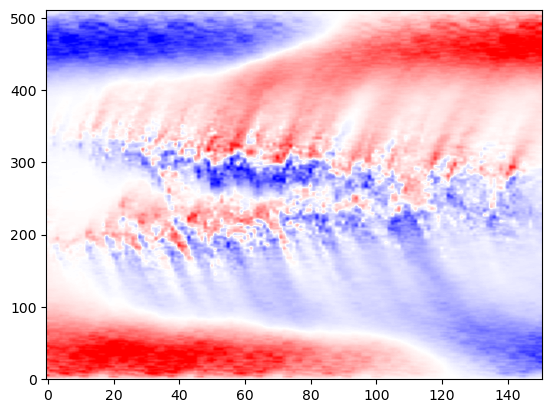

In [23]:
from matplotlib.colors import ListedColormap
import sunpy.visualization.colormaps
import matplotlib.colors as colors
aa = np.clip(a, -10, 10)
plt.imshow(aa, origin="lower", cmap="bwr", aspect="auto", vmax=10, vmin=-10)

In [27]:
import numpy as np
import tqdm.notebook as tq
n = aftdata.filelist.size
north = np.zeros((n,1024))
south  = np.zeros((n,1024))
pbar = tq.tqdm(total=n)
for a, i in zip(aftdata.aftmaps, range(n)):
    bmap = a.aftmap
    tt = Time(a.time).decimalyear
    ns = bmap[256:,:].sum(axis=0)
    ss = bmap[0:256,:].sum(axis=0)
    north[i, :] = ns
    south[i, :] = ss
    pbar.update()
pbar.close()

  0%|          | 0/19975 [00:00<?, ?it/s]

In [11]:
import os
os.path.abspath("./")

'/Users/bjha/GitWork/aftpy'

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import os
import sys

20588.135639609136

## PFSS

In [12]:
# map1 = sunpy.map.Map("/Users/bjha/Data/AFT/test_fits/2014/01/AFTmap_20140101_0000.fits")
map1 = sunpy.map.Map(aftmap1.aftmap, aftmap1.header) 
map2 = sunpy.map.Map("/Users/bjha/Downloads/AFTmap_20120101_0000.fits")
carr_header = make_heliographic_header(map1.date, map1.observer_coordinate,
                                       (512, 1024), frame='carrington', projection_code="CEA")
mapout = map1.reproject_to(carr_header)

#pfss
nrho = 35
rss = 2.5
pfss_in = pfsspy.Input(mapout, nrho, rss)
pfss_out = pfsspy.pfss(pfss_in)
ss_br = pfss_out.source_surface_br

In [15]:
aftmap1.metadata

{'aft_ver1': 'HMI_Baseline4',
 'author': 'Lisa A. Upton & Bibhuti K Jha',
 'car_rot': 2225,
 'crln_obs': 70.8400191441,
 'crlngedg': 0.0,
 'crlt_obs': -2.94618940353,
 'crrotedg': 2225,
 'date': '2024-01-24T08:09:05.00',
 'farside1': 'No      ',
 'farside2': 'NA      ',
 'grid': 0.351563,
 'last_map': 'hmi.m_720s.20200101_000000_TAI.3.magnetogram.fits',
 'last_obs': '2020.01.01_00:00:00.000_TAI',
 'lattype': 0,
 'map_date': '2020-01-01T00:00:00.000',
 'mapcr': 2225.80322217,
 'mapdata': 'HMI     ',
 'mapjul': 2458849.5,
 'maplon': 70.8400191441,
 'maptime': '2020-01-01T00:00:00.000',
 'maxfield': 500.0,
 'model': 'AFT     ',
 'modelda': 1,
 'modelver': 0.0,
 'naxis1': 1024,
 'naxis2': 512,
 'obs_data': 'hmi.M_720s'}

Text(0.5, 1.0, 'Source surface magnetic field')

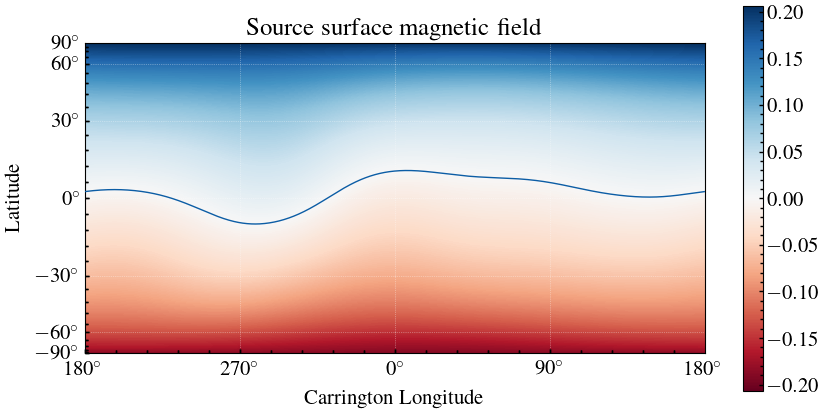

In [13]:
# Create the figure and axes
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(projection=ss_br)

# Plot the source surface map
ss_br.plot()

# Plot the polarity inversion line
ax.plot_coord(pfss_out.source_surface_pils[0])

# Plot formatting
plt.colorbar()
ax.set_title('Source surface magnetic field')

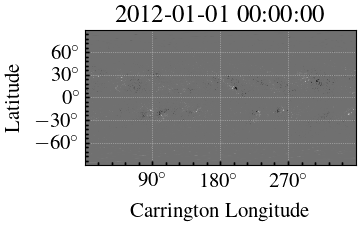

In [93]:
map2.plot()

In [63]:
from sunpy.map.header_helper import make_heliographic_header
map_aft = sunpy.map.Map(aftmap2.aftmap, aftmap2.header)
carr_header = make_heliographic_header(map_aft.date, map_aft.observer_coordinate,
                                       aftmap2.aftmap.shape, frame='carrington', projection_code="CEA")
mapout = map_aft.reproject_to(carr_header)

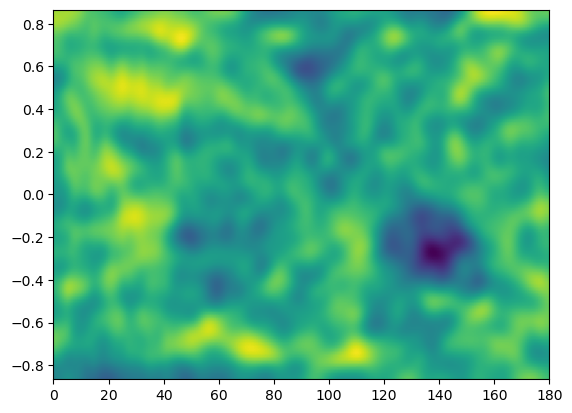

In [11]:
data.shape

(121, 225)

Text(0.5, 1.0, 'Source surface magnetic field')

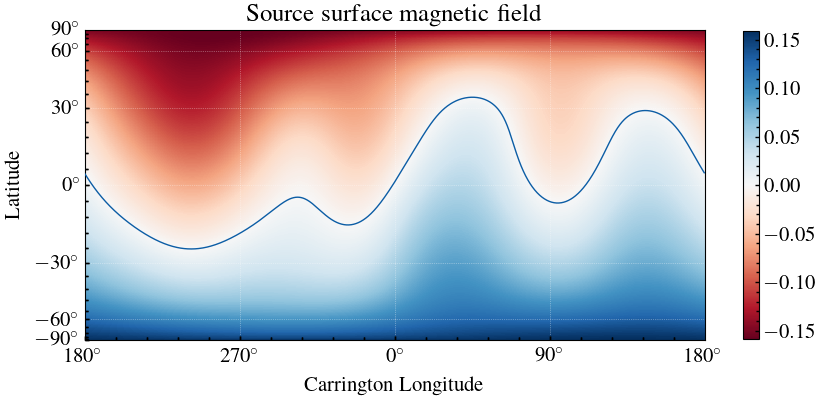

In [65]:
import pfsspy
from pfsspy import coords, tracing

nrho = 35
rss = 2.5

pfss_in = pfsspy.Input(mapout, nrho, rss)

pfss_out = pfsspy.pfss(pfss_in)
ss_br = pfss_out.source_surface_br

# Create the figure and axes
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(projection=ss_br)

# Plot the source surface map
ss_br.plot()

# Plot the polarity inversion line
ax.plot_coord(pfss_out.source_surface_pils[0])

# Plot formatting
plt.colorbar(shrink=0.8)
ax.set_title('Source surface magnetic field')
# set_axes_lims(ax)

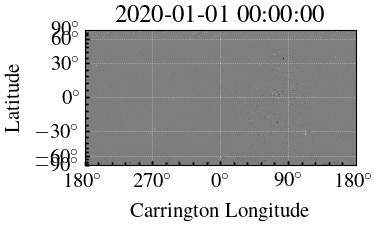

In [38]:
mapout.plot()

In [21]:
aftdata.convert_all(outpath="/Users/bjha/Data/AFT/test_fits")

In [7]:
hipft=aft.AFTmap("/Users/bjha/Data/oft/OFTmaps/hipft_brmap_idx000100.h5",
                 filetype="hipft", timestamp="2024-01-01T00:00:00")

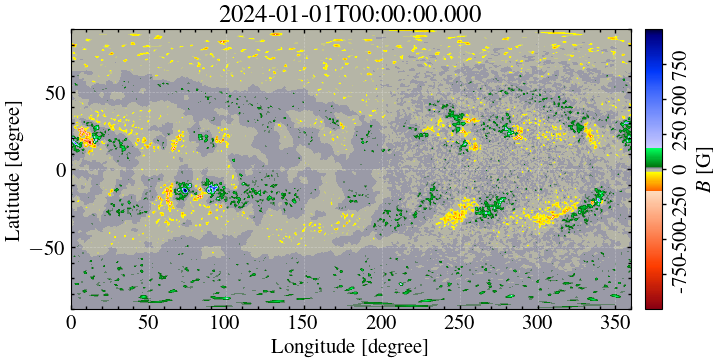

(<Figure size 700x350 with 2 Axes>,
 <Axes: title={'center': '2024-01-01T00:00:00.000'}, xlabel='Longitude [degree]', ylabel='Latitude [degree]'>)

In [8]:
hipft.plot()

In [4]:
import datetime as dt
hipft_prop ={"T0":dt.datetime(2022,1,1), "dt":1}
hipdata = aft.AFTload(path="/Users/bjha/Data/oft/OFTmaps/",
                 filetype="hipft", hipft_prop=hipft_prop)

RootDir   : /Users/bjha/Data/oft/OFTmaps/ 
FileType  : hipft                         
# Files   : 366                           
T-Initial : 2022-01-01 00:00:00           
T-End     : 2023-01-01 00:00:00           


In [14]:
np.round(3.9)

NameError: name 'np' is not defined

In [5]:
daft = aftget.AFTdownload()
url = daft.get_list(t0=dt.datetime(2015, 1,1), t1=dt.datetime(2016, 1,1), cadance=1)
# daft.download(url,rootpath="/Users/bjha/Data/test/")

In [6]:
0bj

,urls
times,
2015-01-01T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-02T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-03T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-04T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-05T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
...,...
2015-12-27T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-12-28T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-12-29T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...


In [2]:
a=AFTdownload()
b=a.get_list(t0=dt.datetime(2013, 1,1), t1=dt.datetime(2014, 1,1), dt=4)

In [3]:
a.download(b, rootpath="/Users/bjha/Data/test/")
# urlretrieve(b.urls.values[0], os.path.basename(b.urls.values[0]))

100%|██████████| 365/365 [01:27<00:00,  4.15it/s]


In [54]:
pd.read_csv("data/list_of_files.csv", index_col="times").index

Index(['2010-05-01T06:00:00', '2010-05-01T12:00:00', '2010-05-01T18:00:00',
       '2010-05-02T00:00:00', '2010-05-02T06:00:00', '2010-05-02T12:00:00',
       '2010-05-02T18:00:00', '2010-05-03T00:00:00', '2010-05-03T06:00:00',
       '2010-05-03T12:00:00',
       ...
       '2023-12-30T12:00:00', '2023-12-30T18:00:00', '2023-12-31T00:00:00',
       '2023-12-31T06:00:00', '2023-12-31T12:00:00', '2023-12-31T18:00:00',
       '2024-01-01T00:00:00', '2024-01-01T06:00:00', '2024-01-01T12:00:00',
       '2024-01-01T18:00:00'],
      dtype='object', name='times', length=19975)

In [96]:
os.path.basename(b.urls.iloc[0])

'AFTmap_20120101_0000.h5'

In [98]:
np.full(10, "data")

array(['data', 'data', 'data', 'data', 'data', 'data', 'data', 'data',
       'data', 'data'], dtype='<U4')